<a href="https://colab.research.google.com/github/AndrewKorn/physics_nsu/blob/main/biprisma_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import cos, sin, pi, tan, atan
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider, widgets
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy.spatial import cKDTree

In [ ]:
def cot(x):
  return cos(x) / sin(x)

In [ ]:
a = 1000      # Расстрояние от источника до бипризмы
lens_h = a   # Высота половины бипризмы

fi = 0.001 # Угол отклонения

a, fi


(1000, 0.001)

In [ ]:
"""
  betta - угол наклона относительно оси Ox
"""
def get_line(betta, fi_angle):
  x_inter_biprisma = a
  y_inter_biprisma = a * tan(betta)
  
  line_angle = betta - fi_angle + pi

  return x_inter_biprisma, y_inter_biprisma, line_angle

In [ ]:
"""
x_1 + k * cos(angle_1) = x_2 + m * cos(angle_2)
y_1 + k * sin(angle_1) = y_2 + m * sin(angle_2)
"""

def get_lines_inter(x_1, y_1, angle_1, x_2, y_2, angle_2):
  k = ((x_2 - x_1) + (y_1 - y_2) * cot(angle_2)) / ((1 - tan(angle_1) * cot(angle_2)) * cos(angle_1))

  return x_1 + k * cos(angle_1), y_1 + k * sin(angle_1)

# Test
get_lines_inter(1, 1, pi/4, 5, 2, pi * 3/4)

(3.5000000000000004, 3.5)

In [ ]:
angle_k = 1
angle_min = -atan(lens_h / a) / angle_k
angle_max = atan(lens_h / a) / angle_k
angles_count = 1000

str(angle_min / pi) + " pi", str(angle_max / pi) + " pi", angles_count

('-0.25 pi', '0.25 pi', 1000)

In [ ]:
angles_top = np.linspace(0, angle_max, angles_count)
angles_top[:10], angles_top[-10:]

(array([0.        , 0.00078618, 0.00157237, 0.00235855, 0.00314474,
        0.00393092, 0.00471711, 0.00550329, 0.00628947, 0.00707566]),
 array([0.7783225 , 0.77910869, 0.77989487, 0.78068106, 0.78146724,
        0.78225343, 0.78303961, 0.78382579, 0.78461198, 0.78539816]))

In [ ]:
angles_bot = np.linspace(angle_min, 0, angles_count)
angles_bot[:10], angles_bot[-10:]

(array([-0.78539816, -0.78461198, -0.78382579, -0.78303961, -0.78225343,
        -0.78146724, -0.78068106, -0.77989487, -0.77910869, -0.7783225 ]),
 array([-0.00707566, -0.00628947, -0.00550329, -0.00471711, -0.00393092,
        -0.00314474, -0.00235855, -0.00157237, -0.00078618,  0.        ]))

In [ ]:
angles = np.linspace(angle_min, angle_max, angles_count)
angles[:10], angles[-10:]

(array([-0.78539816, -0.78382579, -0.78225343, -0.78068106, -0.77910869,
        -0.77753632, -0.77596395, -0.77439158, -0.77281921, -0.77124685]),
 array([0.77124685, 0.77281921, 0.77439158, 0.77596395, 0.77753632,
        0.77910869, 0.78068106, 0.78225343, 0.78382579, 0.78539816]))

In [ ]:

lines_top = np.array([get_line(angle, fi) for angle in angles_top])
lines_bot = np.array([get_line(angle, -fi) for angle in angles_bot])
lines_top[:10], lines_bot[:10]

(array([[1.00000000e+03, 0.00000000e+00, 3.14059265e+00],
        [1.00000000e+03, 7.86184510e-01, 3.14137884e+00],
        [1.00000000e+03, 1.57236999e+00, 3.14216502e+00],
        [1.00000000e+03, 2.35855742e+00, 3.14295121e+00],
        [1.00000000e+03, 3.14474776e+00, 3.14373739e+00],
        [1.00000000e+03, 3.93094199e+00, 3.14452358e+00],
        [1.00000000e+03, 4.71714107e+00, 3.14530976e+00],
        [1.00000000e+03, 5.50334599e+00, 3.14609594e+00],
        [1.00000000e+03, 6.28955772e+00, 3.14688213e+00],
        [1.00000000e+03, 7.07577721e+00, 3.14766831e+00]]),
 array([[ 1000.        , -1000.        ,     2.35719449],
        [ 1000.        ,  -998.42886618,     2.35798067],
        [ 1000.        ,  -996.86019695,     2.35876686],
        [ 1000.        ,  -995.29398457,     2.35955304],
        [ 1000.        ,  -993.73022136,     2.36033923],
        [ 1000.        ,  -992.16889963,     2.36112541],
        [ 1000.        ,  -990.61001175,     2.3619116 ],
        [ 10

In [ ]:

lines_count = angles_count
coords_list = []

for i in range(0, lines_count):
  for j in range(i+1, lines_count):
    coords_list.append(get_lines_inter(
        lines_bot[i][0],
        lines_bot[i][1],
        lines_bot[i][2],
        lines_bot[j][0],
        lines_bot[j][1],
        lines_bot[j][2],
    ))
    coords_list.append(get_lines_inter(
        lines_top[i][0],
        lines_top[i][1],
        lines_top[i][2],
        lines_top[j][0],
        lines_top[j][1],
        lines_top[j][2],
    ))

coords = np.array(coords_list)

coords_x, coords_y = np.hsplit(coords, 2)

In [ ]:
coords_x = coords_x.flatten()
coords_y = coords_y.flatten()

coords_x.min(), coords_x.max(), coords_y.min(), coords_y.max()

(-1.9984259626953644,
 0.0002138157459512513,
 -1.0009993329999816,
 1.0009993330001454)

In [ ]:
shift = max(coords_y.max() - coords_y.min(), coords_x.max() - coords_x.min())

x_min = coords_x.min() # Левая граница наблюдения
x_max = coords_x.min() + shift  # Правая граница наблюдения

y_min = coords_y.min()  # Нижняя граница наблюдения
y_max = coords_y.min() + shift  # Верхняя граница наблюдения

x_min, x_max, y_min, y_max

(-1.9984259626953644,
 0.003572703304762559,
 -1.0009993329999816,
 1.0009993330001454)

In [ ]:
x_range = (x_max - x_min)
y_range = (y_max - y_min)

x_range, y_range

(2.001998666000127, 2.001998666000127)

In [ ]:

x_delta = 100 # Количество столбцов
y_delta = 100 # Количество строк

x_linspace = np.linspace(x_min, x_max, x_delta)
y_linspace = np.linspace(y_min, y_max, y_delta)

In [ ]:
x_left = min(0, x_min)
x_right = max(0, x_max)

x_left, x_right

(-1.9984259626953644, 0.003572703304762559)

In [ ]:
y_left = min(0, y_min)
y_right = max(0, y_max)

y_left, y_right

(-1.0009993329999816, 1.0009993330001454)

In [ ]:
plot_left = min(y_left, x_left)
plot_right = max(y_right, x_right)

## Draw)

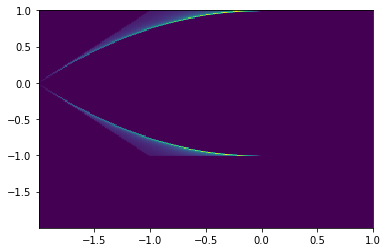

In [ ]:

plot_linspace = np.linspace(plot_left, plot_right, max(x_delta, y_delta) * 2)
plt.hist2d(coords_x, coords_y, bins=[plot_linspace, plot_linspace])

plt.show()

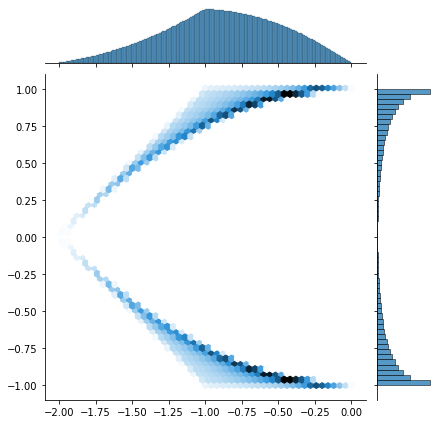

In [ ]:
sns.jointplot(x=coords_x, y=coords_y, kind='hex')
plt.show()